# Интернет-магазин "Стримчик". Анализ популярности продоваемых продуктов

## Описание данных 

В данном проекте нам предстоит выявить определяющие закономерности успешности игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Нужно проанализировать поведение клиентов интернет-магазина "Стримчик". Нам доступны данные за прошедший год (2016), а прогнозы сделать на следующий год. 

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Нам необходимо исследовать игры с разных сторон, определить самые популярные жанры и платформы для разных регионов, изучить, как влияют на продажи оценки критиков и пользователей. 

План проектра:
* Обзор данных
* Подготовка данных к анализу 
* Анализ данных 
* Проверка гипотез

## Обзор данных

In [67]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from io import BytesIO
import requests

In [2]:

#df_games = pd.read_csv('/datasets/games.csv')

spreadsheet_id = '1I0WVkbFtKxzYXbKRvoW2qyC7nk1XIPOITG_ZqI_7LPg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_games = pd.read_csv(BytesIO(r.content))

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df_games.info()
df_games.tail(20)
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных к анализу

В данной части нашей работы мы приступаем к обработке таблицы и ее данных:
* Меняем названия столбцов
* Приводим данные к нужным типам
* Выщитываем дополнительные параметры (если нужно)
* Ищем пропуски и дубликаты 

In [5]:
df_games.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(3000) # так как в столбце с "годом выпуска" есть пропуски, я решил, что удалить все строки будет как то не хорошо, по этому заменил их "невозможным" значением
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

In [8]:
df_games.isna().sum()



name                  2
platform              0
year_of_release       0
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df_games.duplicated().sum()

0

In [10]:
df_games.dropna(subset = ['name'], inplace = True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [11]:
df_games['user_score'].value_counts()
df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,3000,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [12]:
df_games['user_score'].replace('tbd', np.nan, inplace=True)
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Изучил рейтинг игроков, считаю что заполнять пропуски в данном столбце не корректно, так как рейтинг понятие относительное и у каждого свое мнение.
Особое внимание привлек рейтинг "tbd" - значит что "рейтинг пока не определен".

In [14]:

def total_sold(row):
    total_sales = row['NA_sales'] + row['EU_sales'] + row['JP_sales'] + row['other_sales']
    total = 0 
    for i in [total_sales]:
        if i > 0:
            total += i
    return total


In [15]:
df_games['total_sales'] = df_games.apply(total_sold, axis=1)
df_games.head(10)


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [16]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Создали функцию для подсчета "суммарных продаж по регионам", функция работает, продажи идут.  

В столбце с рейтингом осталось много пропущенных значений..предлагаю заменить их на 'undefined' (неопределен) 

In [17]:
#df_games['rating'] = df_games['rating'].fillna(undefined)
df_games['rating'].isna().sum()


6764

In [18]:
df_games['rating'] = df_games['rating'].fillna('undefined')
df_games['rating'].isna().sum()

0

## Исследовательский анализ данных 

В части анализа данных нам предстоит сделать следующие шаги:
* Посмотреть, сколько игр выпускалось в разные годы. Ответить на вопрос: "Важны ли данные за все периоды?"
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Ответить на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"
* Взять данные за соответствующий актуальный период. (актуальный период определить самостоятельно по результатам исследования предыдущих вопросов)
* Ответить на вопрос: "Какие платформы лидируют по продажам, растут или падают?" 
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
* Соотнести выводы с продажами игр на других платформах.
* Оценить общее распределение игр по жанрам. 

In [19]:
df_games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
3000     269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [20]:
df_games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [21]:
epoch_platforms = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') #groupby(['platform','year_of_release']).agg({'total_sales':['sum']}).reset_index()
epoch_platforms.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Год выпуска')

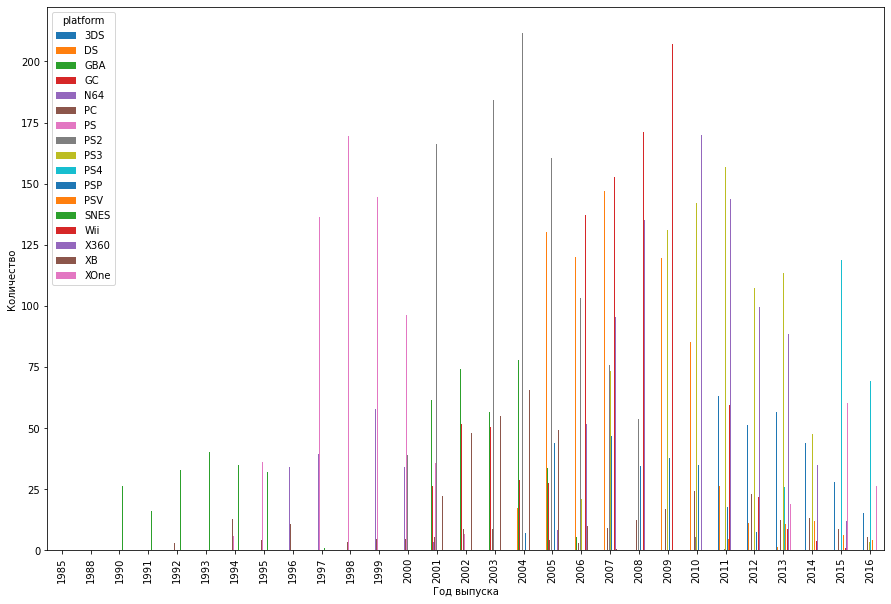

In [72]:
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES']
df_top_platforms = df_games.query('platform == @top_platforms & year_of_release != 3000')
df_top_platforms_pivot = df_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
plt.ylabel("Количество")
plt.xlabel("Год выпуска")

Новые платформы появляются и теряют свою актуальность примерно каждые 5-7 лет. Считаю, что за "актуальный период" можно взять года с 2013-2016.

In [23]:
current_period = df_games.query('2013 <= year_of_release <= 2016').reset_index()

Text(0.5, 0, 'Год выпуска')

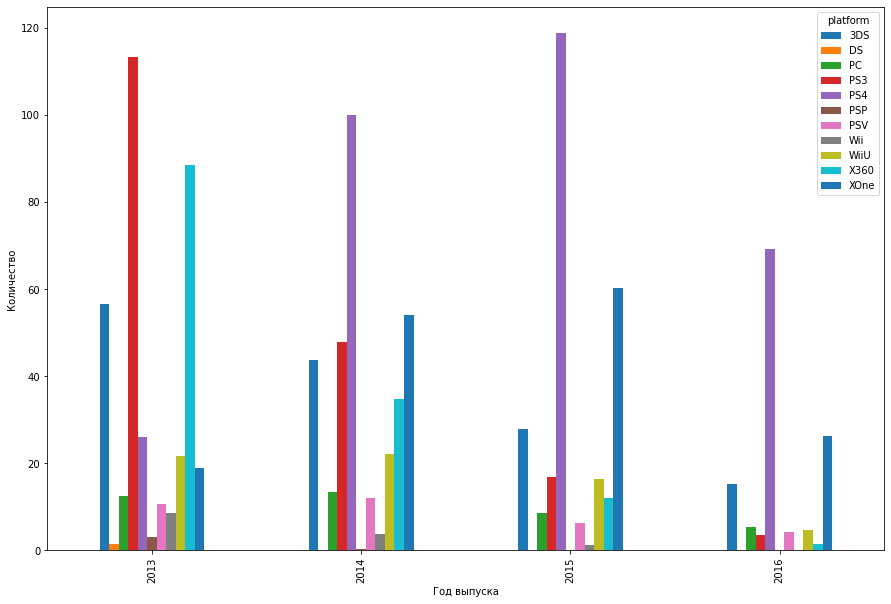

In [71]:
current_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
plt.ylabel("Количество")
plt.xlabel("Год выпуска")

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Эта визуализация лучше предыдущей. 😉</font><br>
<font color='DarkMagenta'>👉 А вот подписи по оси Y явно не хватает. 🙄 И это относится и к другим графикам проекта.</font>

Text(0.5, 0, 'Платформы')

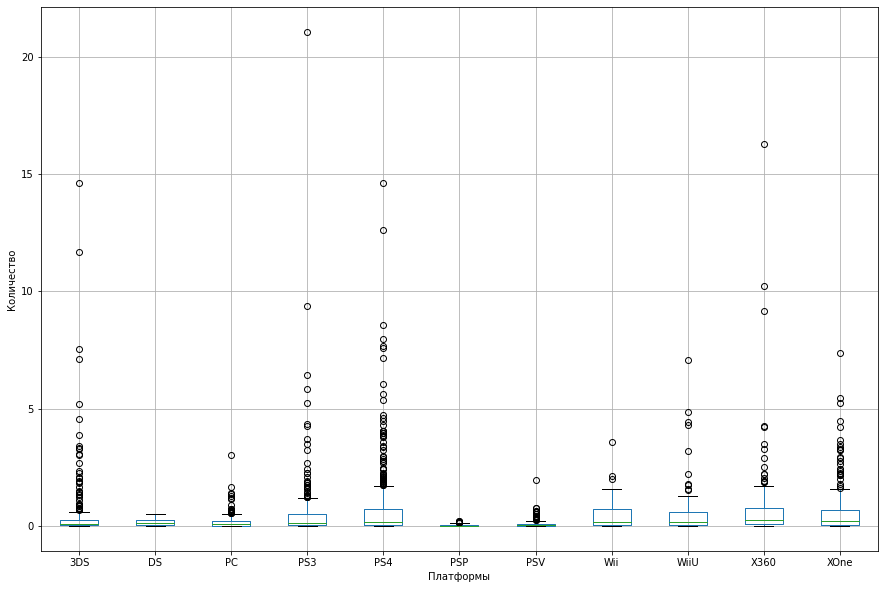

In [73]:
current_period.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').boxplot(figsize=(15,10))
plt.ylabel("Количество")
plt.xlabel("Платформы")

Text(0.5, 0, 'Платформы')

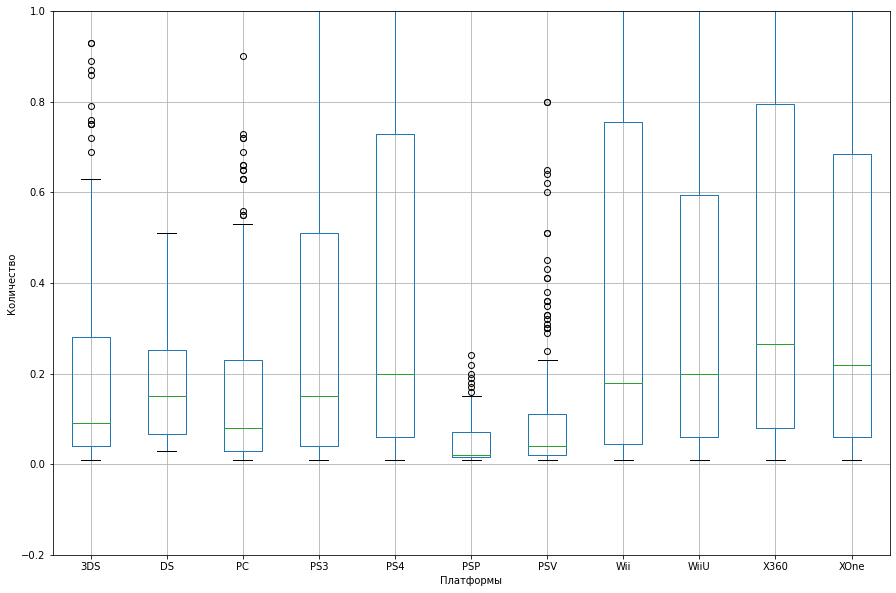

In [74]:
big_platform = current_period.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').boxplot(figsize=(15,10))
plt.ylim(-0.2,1)
plt.ylabel("Количество")
plt.xlabel("Платформы")

Судя по графикам, особой популярностью пользуется консоль нового поколения - PS4. Она уверенно захватывает рынок, но ее предшественник, PS3 все еще не сдает позиции благодаря тому, что PlayStation все еще занимается поддержкой данной консоли и выпуском актуальных игр. ХOne проиграл в гонке с PS4. 

Изучим, как влияют на продажи определенной платформы отзывы пользователей и критиков. 

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

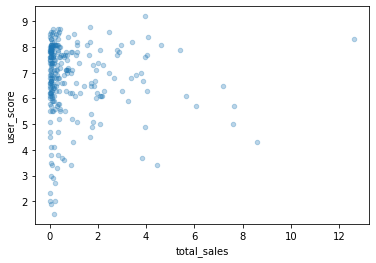

In [27]:
current_period.query('platform == "PS4"').plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

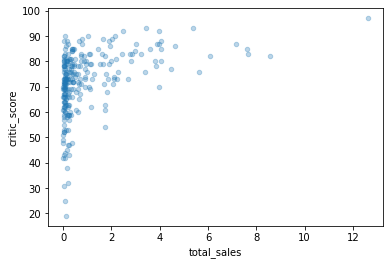

In [28]:
current_period.query('platform == "PS4"').plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)

На графике прослеживается зависимость продаж от оценок, с увеличением оценок растут продажи. Оценка пользователей от 6 - 9  влияет сильней на продажи некоторых игр, чем оценки критиков. Но при оценках критиков от 70 баллов и выше продажи идут больше, чем от оценок пользователей.

Посчитаем общую корреляцию для всех продаж:

In [29]:
df_games[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.245507,0.088179
critic_score,0.245507,1.000000,0.580878
user_score,0.088179,0.580878,1.000000


Присутствует положительная корреляция продаж от мнения критиков, а вот от пользователей она очень маленькая..возможно это потому что оценок пользователей и так было меньше, так еще и рейтинг "tbd" мы заменили на Nan..
Хорошая положительная корреляция от критиков - к пользователям, но сами пользователи не охотно ставят оценки продуктам..

Теперь посмотрим на корреляцию для платформы PS4:

In [30]:
PS4 = current_period.query('platform == "PS4"')
PS4['user_score'] = pd.to_numeric(PS4['user_score'], errors='coerce')
PS4[['total_sales', 'critic_score', 'user_score']].corr()


C:\Users\dosy7\AppData\Local\Temp/ipykernel_7716/855295291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS4['user_score'] = pd.to_numeric(PS4['user_score'], errors='coerce')


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Судя по рассчитанной корреляции для PS4, оценка пользователй вызывает отрицательную корреляцию, а критиков - положительную. 

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

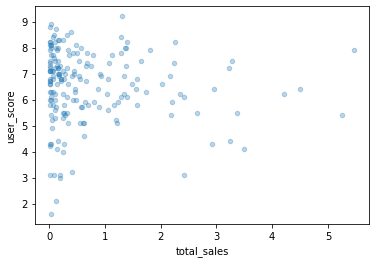

In [31]:
current_period.query('platform == "XOne"').plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

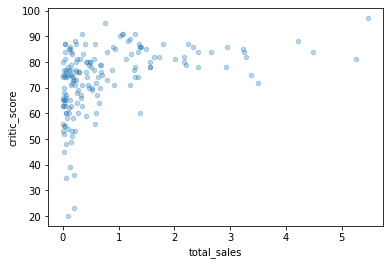

In [32]:
current_period.query('platform == "XOne"').plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)

In [33]:
XOne = current_period.query('platform == "XOne"')
XOne['user_score'] = pd.to_numeric(XOne['user_score'], errors='coerce')
XOne[['total_sales', 'critic_score', 'user_score']].corr()

C:\Users\dosy7\AppData\Local\Temp/ipykernel_7716/3527704109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XOne['user_score'] = pd.to_numeric(XOne['user_score'], errors='coerce')


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

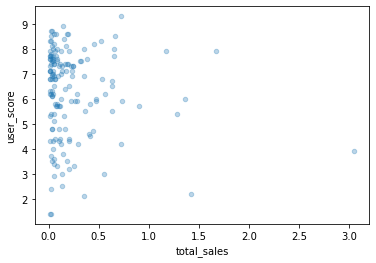

In [34]:
current_period.query('platform == "PC"').plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

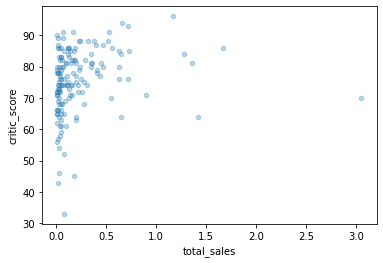

In [35]:
current_period.query('platform == "PC"').plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)

In [36]:
PC = current_period.query('platform == "PC"')
PC['user_score'] = pd.to_numeric(PC['user_score'], errors='coerce')
PC[['total_sales', 'critic_score', 'user_score']].corr()

C:\Users\dosy7\AppData\Local\Temp/ipykernel_7716/1210266853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC['user_score'] = pd.to_numeric(PC['user_score'], errors='coerce')


,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


Text(0.5, 0, 'Жанры')

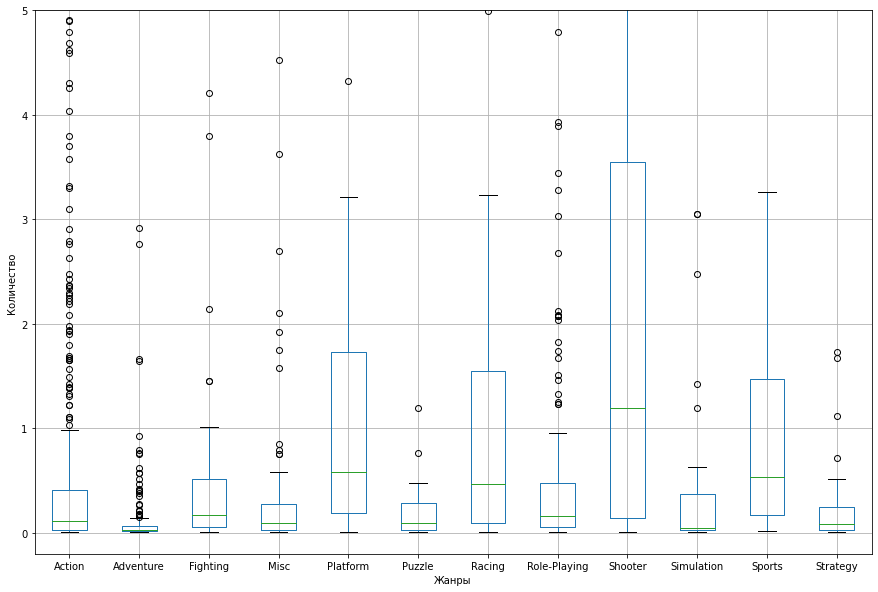

In [75]:
current_period.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').boxplot(figsize=(15,10))
plt.ylim(-0.2,5)
plt.ylabel("Количество")
plt.xlabel("Жанры")

Мы построили диаграммы размаха по всем жанрам игр. Особенно выделяются "Шутеры", их можно считать безоговорычным лидером на рынке продаж. ИХ медианное значение в иной момент выше выбросов некоторых жанров! "Гонки", "Платформеры" и "Спорт" идут следом, но им еще оочень далеко..
Жанр с самым низким показателем - "Приключения". Скамем так, чтоб рассмотреть значения в этом жанре по лучше, необходимо использовать микроскоп..
"Активные" игры выделяются тем, что у них огромное количетво выбросов.

Делая вывод по продажам и оценке пользователей/критиков можно сказать:
* Общая корреляция - положительная;
* PS4 имеет наименьшую отрицательную (но все же отрицательную) корреляцию продаж от оценок пользователей, продажи от оценок критиков - положительная корреляция;
* ХOne имеет меньшую популярность, но суть остается такая же, чем выше оценка у продукта - тем чаще его покупают;
* Продукт на PC имеет меньшую цену, чем на платформы PS и Xbox, а пользователи чаще ставят оценки от 6 - 8, чем на других платформах. 

### Итог по анализу данных: 
Проведя исследовательский анализ полученных данных, можно выделить следующее: 

* Самое продуктивное время в геймдеве с 2007 - 2011 годы, пик в 2008; 
* Судя по таблице, самое большое колличество продукта было произведено на платформе PS2, но для нашего исследования она не годится..слишком давно ушла "на покой";
* "Актуальный период" для исследования выбран - с 2013 по 2016 год;
* Актуальные платформы в актуальный период: 
    * PS4 --- топ 1
    * PS3 
    * XOne
    * PC
    * 3DS
    * PSV
* Общая корреляция между продажами и отзывами критиков/пользователей за актуальный период - положительная, а вот высчитывая корреляцию для отдельных платформ, корреляция от пользовательских оценок становится отрицательной;
* Судя по диаграмме размаха самый прибольный жанр игр - "Шутер", а самый не прибыльный - "Приключения".

## Портрет пользователей отдельных регионов 

In [38]:
user_NA = current_period.groupby('platform')['NA_sales'].sum()
user_NA.sort_values(ascending = False).head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: NA_sales, dtype: float64

<AxesSubplot:ylabel='NA_sales'>

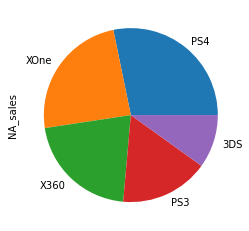

In [39]:
user_NA.sort_values(ascending = False).head().plot(y='platform', kind='pie')

In [40]:
user_EU = current_period.groupby('platform')['EU_sales'].sum()
user_EU.sort_values(ascending = False).head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: EU_sales, dtype: float64

<AxesSubplot:ylabel='EU_sales'>

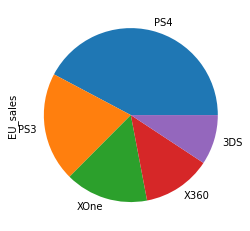

In [41]:
user_EU.sort_values(ascending = False).head().plot(y='platform', kind='pie')

In [42]:
user_JP = current_period.groupby('platform')['JP_sales'].sum()
user_JP.sort_values(ascending = False).head()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: JP_sales, dtype: float64

<AxesSubplot:ylabel='JP_sales'>

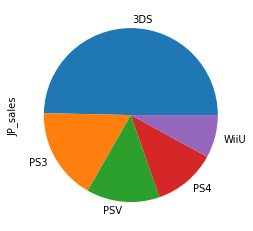

In [43]:
user_JP.sort_values(ascending = False).head().plot(y='platform', kind='pie')

<AxesSubplot:xlabel='platform'>

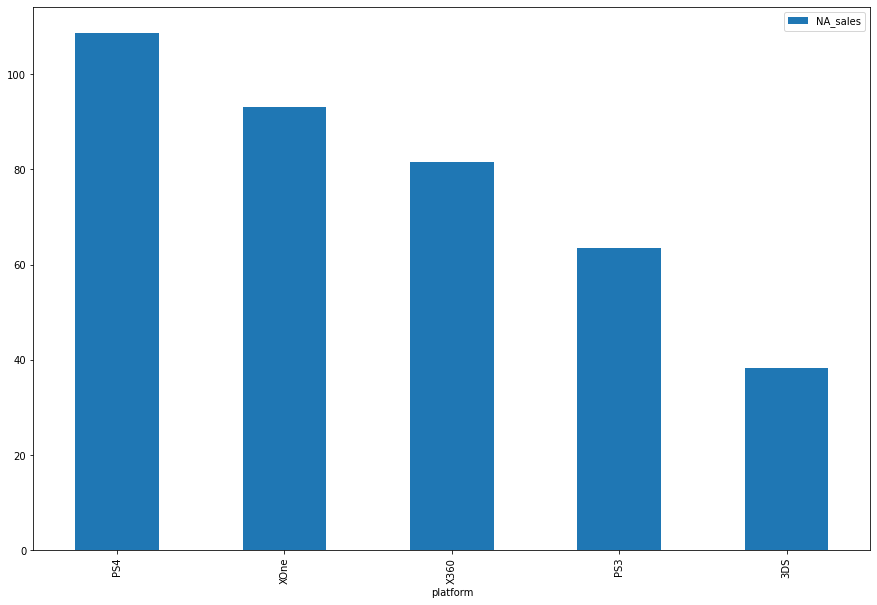

In [44]:
current_period.pivot_table(index='platform', values='NA_sales', aggfunc='sum').sort_values(by='NA_sales', ascending = False).head().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='platform'>

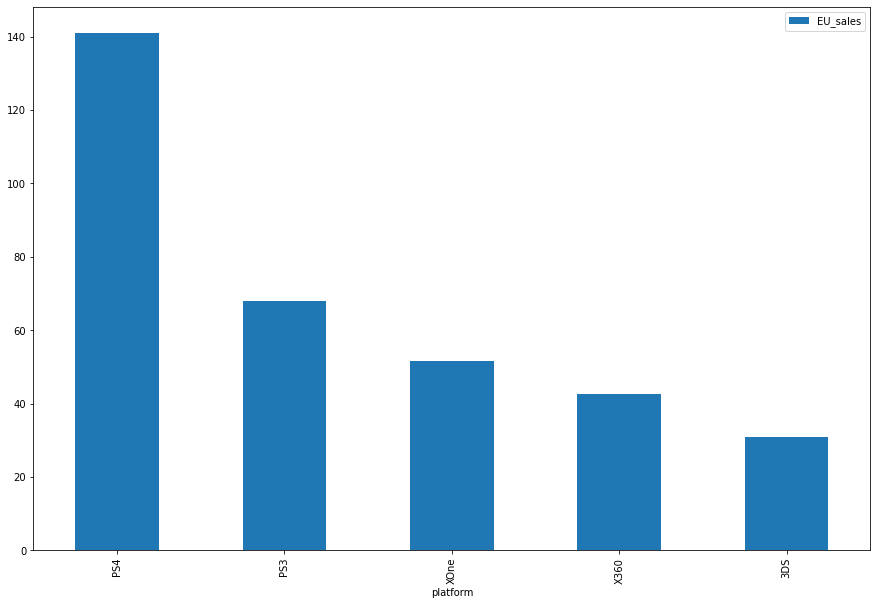

In [45]:
current_period.pivot_table(index='platform', values='EU_sales', aggfunc='sum').sort_values(by='EU_sales', ascending = False).head().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='platform'>

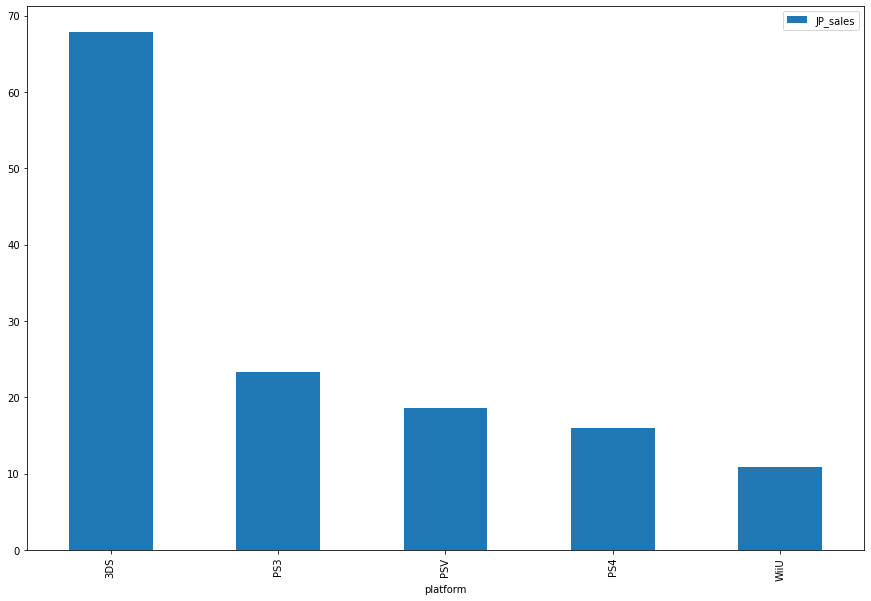

In [46]:
current_period.pivot_table(index='platform', values='JP_sales', aggfunc='sum').sort_values(by='JP_sales', ascending = False).head().plot(kind='bar', figsize=(15,10))

In [47]:
current_period['rating'].value_counts()

undefined    977
M            369
T            333
E            302
E10+         252
Name: rating, dtype: int64

In [48]:
top_rating_in_NA = current_period.groupby('rating')['NA_sales'].sum()
top_rating_in_NA.sort_values(ascending = False).head()

rating
M            165.21
undefined     89.42
E             79.05
E10+          54.24
T             49.79
Name: NA_sales, dtype: float64

<AxesSubplot:ylabel='NA_sales'>

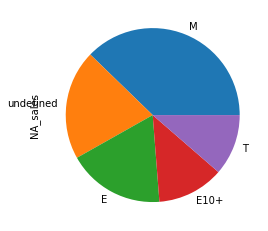

In [49]:
top_rating_in_NA.sort_values(ascending = False).head().plot(y='genre', kind='pie')

In [50]:
top_rating_in_EU = current_period.groupby('rating')['EU_sales'].sum()
top_rating_in_EU.sort_values(ascending = False).head()

rating
M            145.32
E             83.36
undefined     78.91
E10+          42.69
T             41.95
Name: EU_sales, dtype: float64

<AxesSubplot:ylabel='EU_sales'>

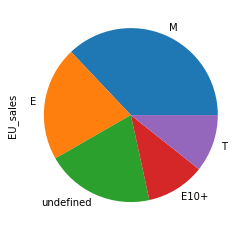

In [51]:
top_rating_in_EU.sort_values(ascending = False).head().plot(y='genre', kind='pie')

In [52]:
top_rating_in_JP = current_period.groupby('rating')['JP_sales'].sum()
top_rating_in_JP.sort_values(ascending = False).head()

rating
undefined    85.05
T            20.59
E            15.14
M            14.11
E10+          5.89
Name: JP_sales, dtype: float64

<AxesSubplot:ylabel='JP_sales'>

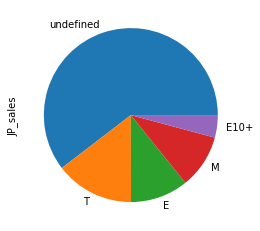

In [53]:
top_rating_in_JP.sort_values(ascending = False).head().plot(y='genre', kind='pie')

In [54]:
# Комментарий ревьюера
temp = current_period.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


undefined    977
M            369
T            333
E            302
E10+         252
Name: rating, dtype: int64

In [55]:
top_genre_in_NA = current_period.groupby('genre')['NA_sales'].sum()
top_genre_in_NA.sort_values(ascending = False).head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: NA_sales, dtype: float64

Text(0.5, 1.0, 'Топ-5 жанров в Штатах')

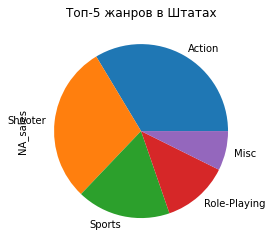

In [56]:
top_genre_in_NA.sort_values(ascending = False).head().plot(y='genre', kind='pie')
plt.title('Топ-5 жанров в Штатах')

Text(0.5, 0, 'Жанры на платформах')

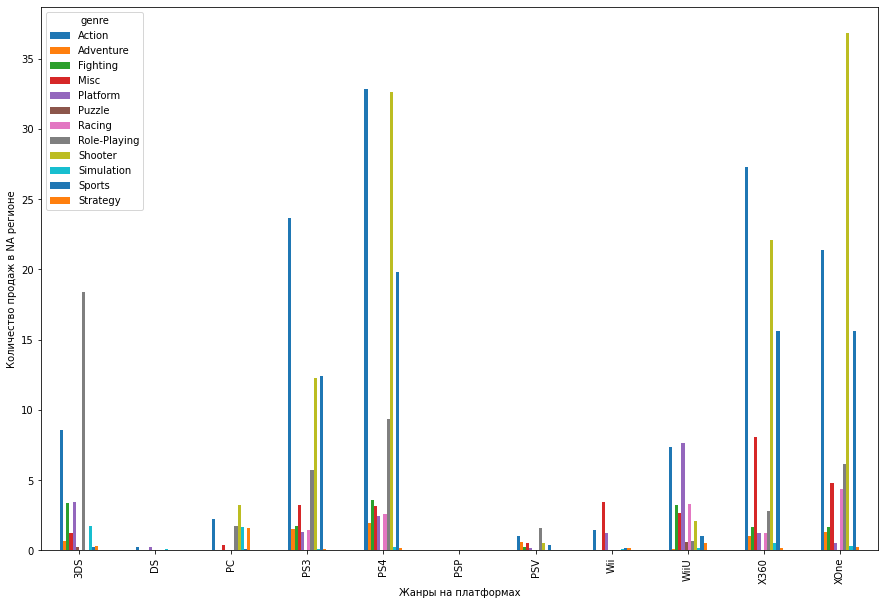

In [76]:
current_period.pivot_table(index='platform', columns='genre', values='NA_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
plt.ylabel("Количество продаж в NA регионе")
plt.xlabel("Жанры на платформах")

In [58]:
top_genre_in_EU = current_period.groupby('genre')['EU_sales'].sum()
top_genre_in_EU.sort_values(ascending = False).head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: EU_sales, dtype: float64

Text(0.5, 1.0, 'Топ-5 жанров в Европе')

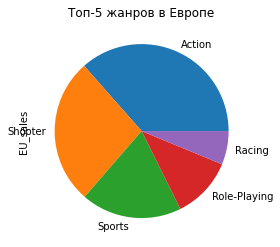

In [59]:
top_genre_in_EU.sort_values(ascending = False).head().plot(x='genre', kind='pie')
plt.title('Топ-5 жанров в Европе')

Text(0.5, 0, 'Жанры на платформах')

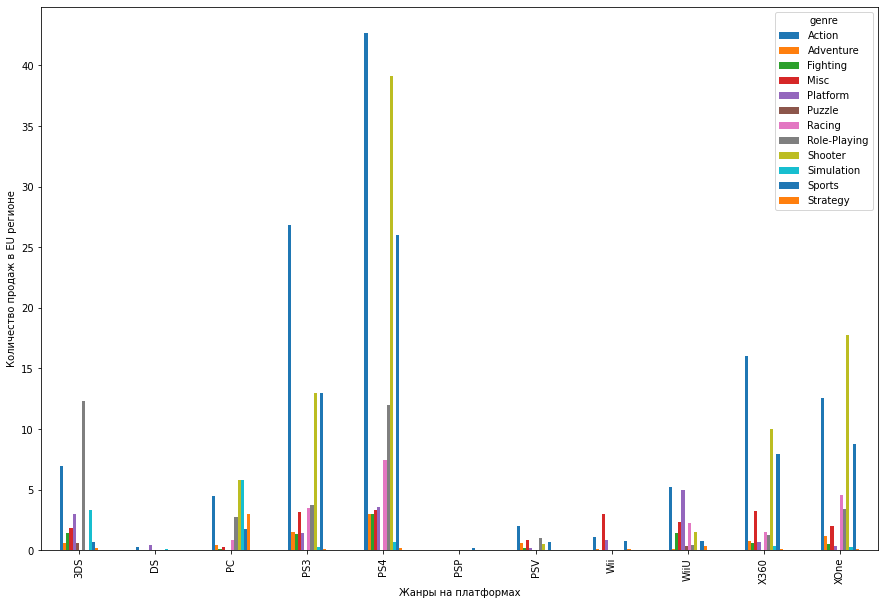

In [77]:
current_period.pivot_table(index='platform', columns='genre', values='EU_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
plt.ylabel("Количество продаж в EU регионе")
plt.xlabel("Жанры на платформах")

In [61]:
top_genre_in_JP = current_period.groupby('genre')['JP_sales'].sum()
top_genre_in_JP.sort_values(ascending = False).head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: JP_sales, dtype: float64

Text(0.5, 1.0, 'Топ-5 жанров в Японии')

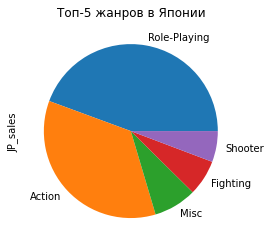

In [62]:
top_genre_in_JP.sort_values(ascending = False).head().plot(y='genre', kind='pie')
plt.title('Топ-5 жанров в Японии')

Text(0.5, 0, 'Жанры на платформах')

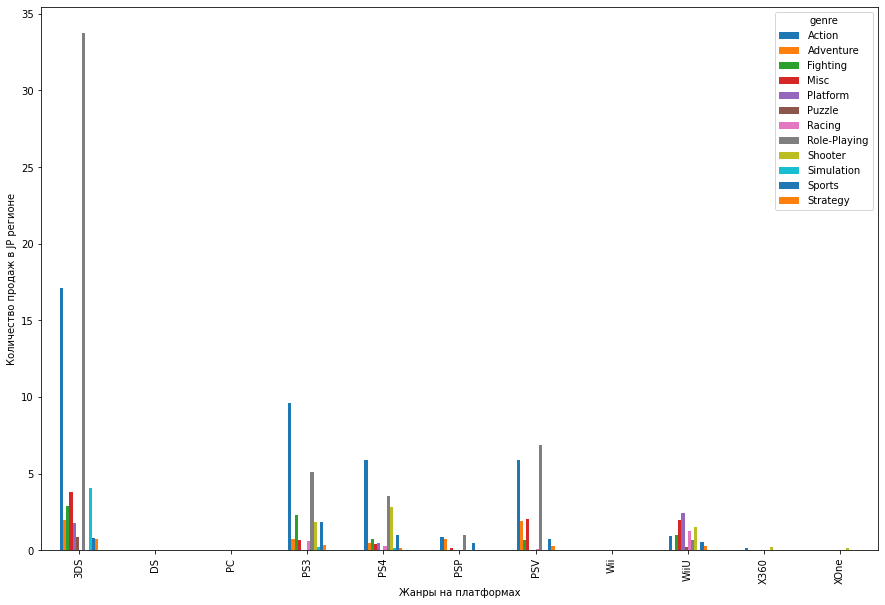

In [78]:
current_period.pivot_table(index='platform', columns='genre', values='JP_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
plt.ylabel("Количество продаж в JP регионе")
plt.xlabel("Жанры на платформах")

Подводя итоге портрета классического пользователя в отдельном регионе, можно выделить следующие пункты:
* PS4 лидирует во всех позициях в Европе и Америке, Япония больше приверженец портативной приставки 3DS;
* В Америке пользователей XOne не сильно меньше, но все же бокс проигрывает в продажах, в Европе его показатели еще хуже, там люди все еще верят и любят PS3, больше чем XOne (лидер все тот же PS4);
* Пользователи из США и Европы предпочитают вкладывать свои деньги в игры рейтингом М (для взрослых, старше 17 лет), в Японии -  ESRB рейтинг не выставляется, по этому у них на первом месте идут "игры без рейтинга";
* По части игровых жанров, NA и EU, опять же, схожи..пользователи охотнее играют в "Активные" и "Стрелялки", Япония опять отличилась и у них топ 1 занимают "Ролевые игры".

## Проверка гипотез

Гипотезы для проверки:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулируем гипотезы для проверки средних пользовательских рейтингов ХOne и PC:
* H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC - разные.

In [64]:
mean_X_rating = current_period[(current_period['platform'] == 'XOne') & (current_period['user_score'] > 0)]['user_score']

mean_PC_rating = current_period[(current_period['platform'] == 'PC') & (current_period['user_score'] > 0)]['user_score']

#& (current_period['user_score'] > 0)
# & (current_period['user_score'] > 0)
alpha = 0.05

result = st.ttest_ind(
    mean_X_rating, 
    mean_PC_rating)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('Средний пользовательский рейтинг платформы XOne:', mean_X_rating.mean())
print('Средний пользовательский рейтинг платформы PC:', mean_PC_rating.mean())

p-значение: 0.14012658403611647
Не отвергаем нулевую гипотезу
Средний пользовательский рейтинг платформы XOne: 6.52142857142857
Средний пользовательский рейтинг платформы PC: 6.269677419354836


Средние пользовательские рейтинги платформ - одинаковые, гипотеза подтвердилась. 

Формулируем гипотезы для проверки средних пользовательских рейтингов жанров Action и Sports:
* H0 - Средние пользовательские рейтинги жанров Action и Sports - не различаются;
* H1 - Средний пользовательский рейтинг жанра Action и Sports разные.


In [65]:
mean_action_genre = current_period[(current_period['genre'] == 'Action') & (current_period['user_score'] > 0)]['user_score']

mean_sports_genre = current_period[(current_period['genre'] == 'Sports') & (current_period['user_score'] > 0)]['user_score']

alpha = 0.05

result = st.ttest_ind(
    mean_action_genre, 
    mean_sports_genre)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('Средний пользовательский рейтинг жанра Action:', mean_action_genre.mean())
print('Средний пользовательский рейтинг жанра Sports:', mean_sports_genre.mean())

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action: 6.837532133676097
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


Гипотеза о рейтингах жанров Action и Sports - подтвердилась, они действительно разные! 

## Итог проделанной работы

Проведя все необходимые исследования, мы можем сделать выводы, что: 

* Самая перспективная платформа для развития и инвестиций - PS4;
* "Золотое время" геймдева - 2007 - 2011, с пиком в 2008;
* Пользователи из регионов NA и EU во многом похожи, но отличаются от пользователей из региона JP;
* Пользователи из регионов NA и EU предпочитают игры с рейтингом М, а пользователи региона JP - игры без рейтинга, тк рейтинг  ESRB не распространяется на Японию;
* Корреляция между продажами и отзывами критиков/пользователей за актуальный период - положительная;

Потенциально лучшая перспектива для вложения:

* PS4/XOne - Action/Shooter - NA/EU - rating-M;
* 3DS - "Ролевые игры" - JP - ESRB в Японии не выставляется, у них своя организация.

Проверка гипотез: 

* Гипотеза о рейтингах платформ - не подтвердилась, рейтинги оказались разные;
* Гипотеза о рейтингах жанров - подтвердилась, рейтинги оказались разные.

Рекомендация заказчику:

* Предоставить более точное описание рейтингов игр;
* Изучайте студии разработчиков напрямую;